In [12]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import pandas as pd
import math
from statistics import mean

In [55]:
newFile="WestBengalmodified.csv"
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
df1 = pd.read_csv(newFile)
df1.head()

,MU,period
0,1.7,2013/4/1
1,1.2,2013/4/2
2,0.9,2013/4/3
3,0.8,2013/4/4
4,0.8,2013/4/5


In [59]:
X = df1['MU']

In [60]:
train= X[0:1447]
test=X[1447:]

In [61]:
predictions = list()
train=list(train)
test=list(test)

# We make a prediction for each of the test values
cycles=int(len(train)/4)
for t in range(len(test)):
        diff=[]
        diff_val=[]
        for i in range(0,4):
            diff_val.append(train[t+(i*cycles)])
        diff_v=mean(diff_val)
        for i in range(0,3):
            diff.append(train[t+(i+1)*cycles]-train[t+(i*cycles)])
        avgdiff=mean(diff)
        yhat = diff_v+avgdiff
        predictions.append(yhat)

# The root mean square error is obtained for the predicted and test values

error = math.sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)

Test MSE: 10.566


<Figure size 1600x1200 with 0 Axes>

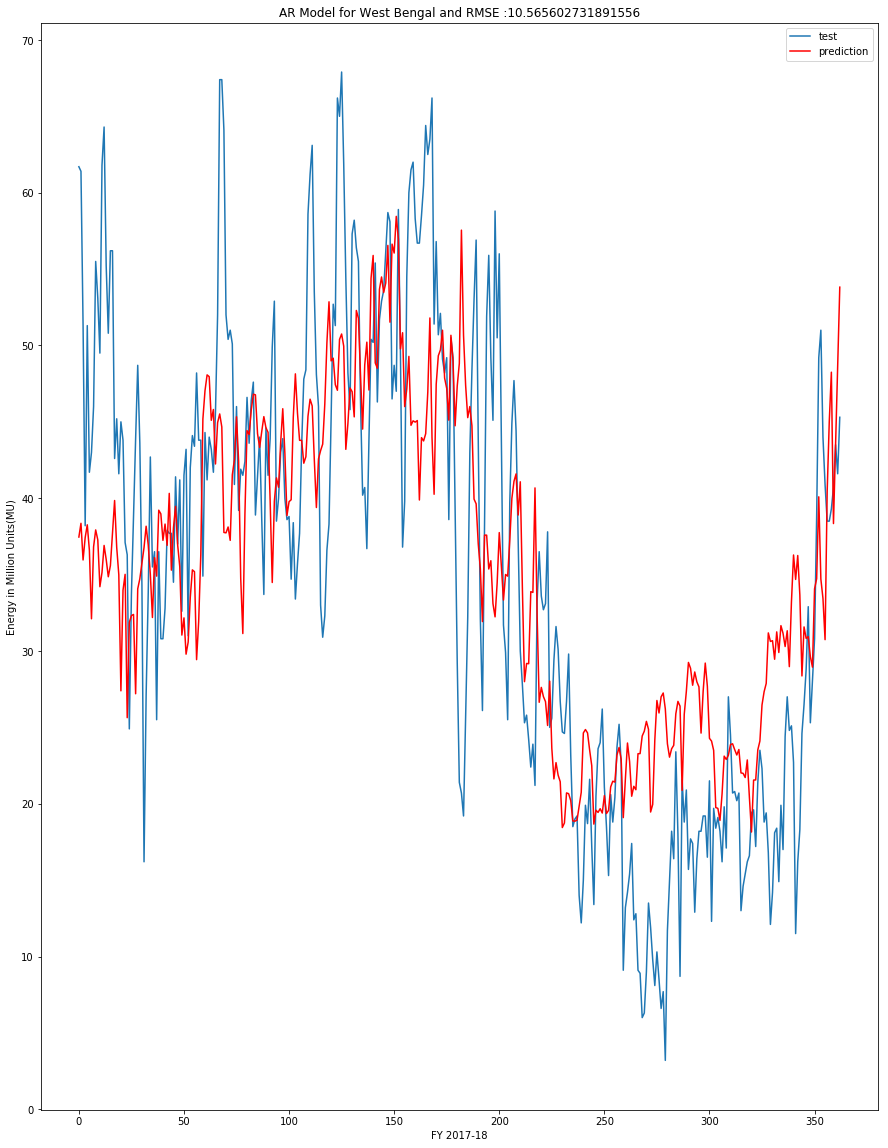

In [62]:
# Made a plot out of the test data and prediction data for the 2017-18 FY

figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
pyplot.figure(figsize=(15,20))
pyplot.plot(test,label='test')

pyplot.plot(predictions, color='red',label='prediction')
pyplot.legend()
pyplot.title("AR Model for West Bengal and RMSE :"+ str(error))
pyplot.xlabel('FY 2017-18')
pyplot.ylabel('Energy in Million Units(MU)')
pyplot.show()